# Binary Classification - 분류

In [8]:
import warnings
warnings.filterwarnings('ignore')

## 실습용 데이터 설정

* pandas DataFrame
 * Default.csv

In [9]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/data/master/Default.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   amount   10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [10]:
DF.head()

,default,student,amount,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [11]:
DF['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

# I. 탐색적 데이터 분석(EDA)

> ## 1) 'default' 빈도분석

In [12]:
DF.default.value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

> ## 2) 'default' vs. 'amount'

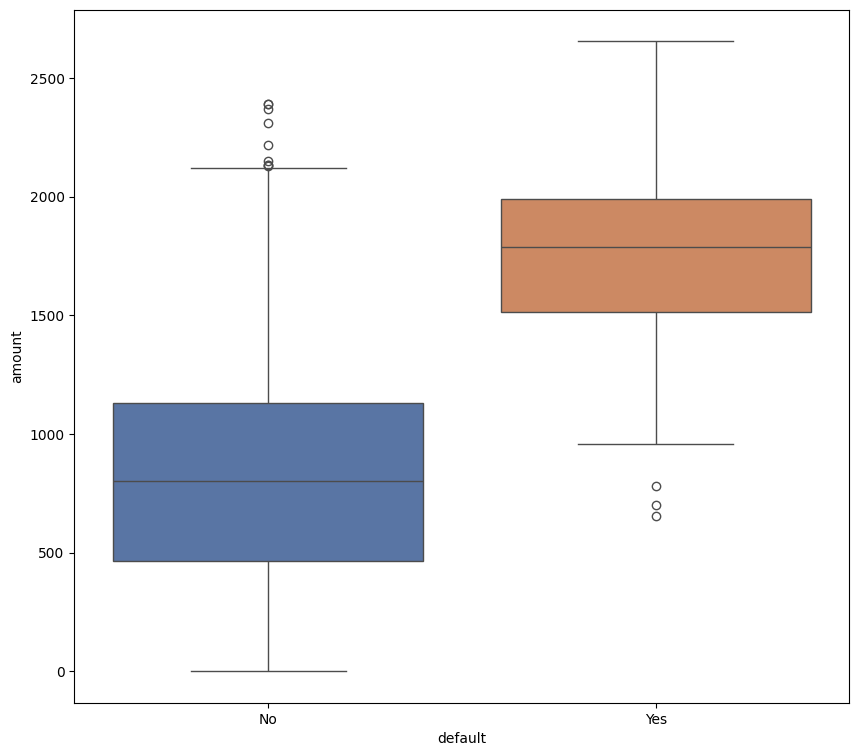

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 9))
sns.boxplot(data = DF,
            x = 'default',
            y = 'amount',
            order = ['No', 'Yes'],
            palette = 'deep')
plt.show()

> ## 3) 'default' vs. 'income'

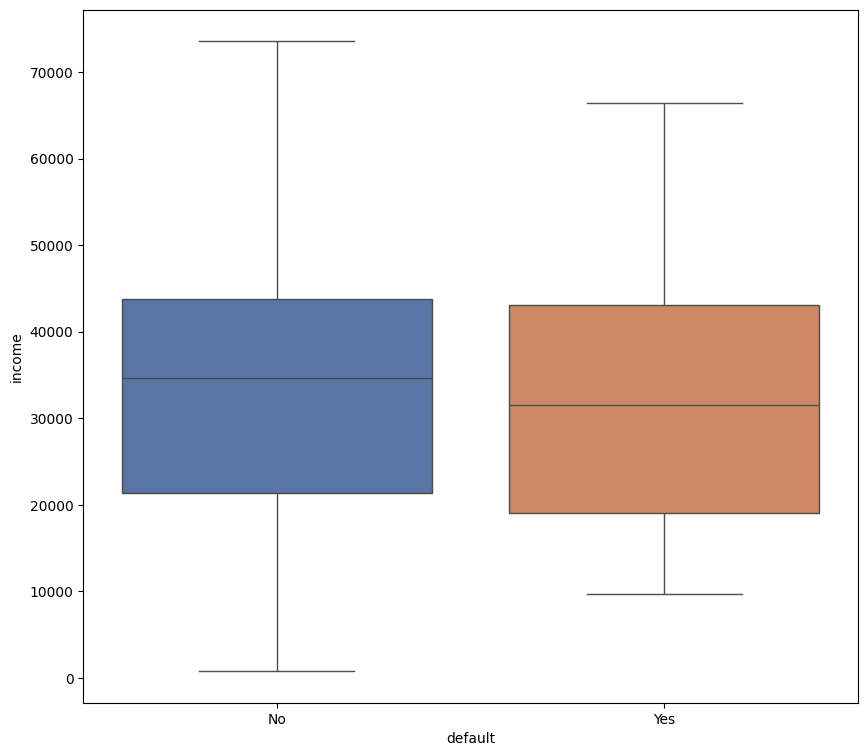

In [14]:
plt.figure(figsize = (10, 9))
sns.boxplot(data = DF,
            x = 'default',
            y = 'income',
            order = ['No', 'Yes'],
            palette = 'deep')
plt.show()

> ## 4) 'student' vs. 'amount'

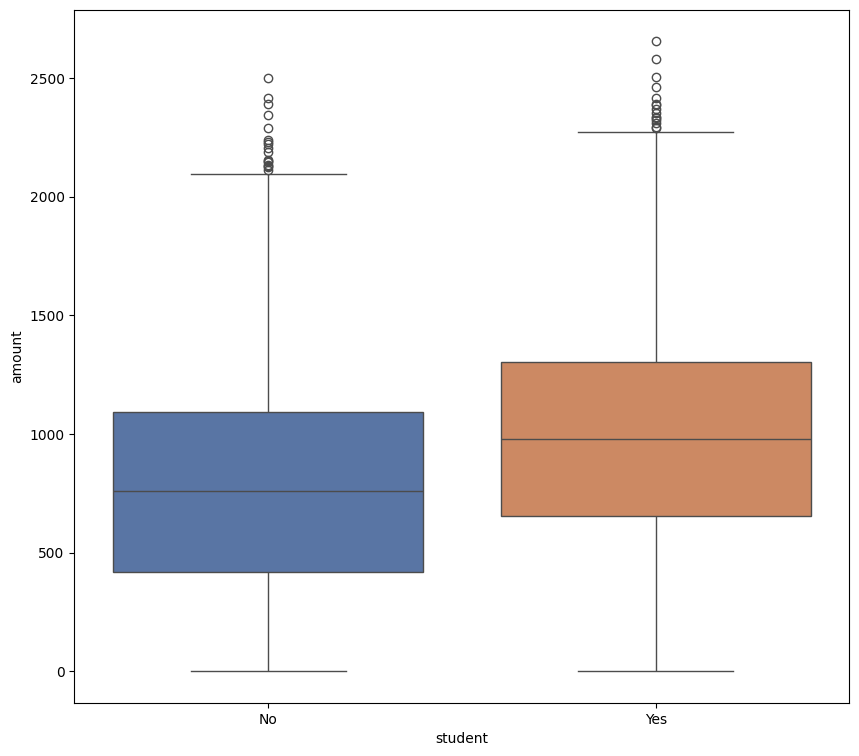

In [15]:
plt.figure(figsize = (10, 9))
sns.boxplot(data = DF,
            x = 'student',
            y = 'amount',
            order = ['No', 'Yes'],
            palette = 'deep')
plt.show()

> ## 5) 'student' vs. 'income'

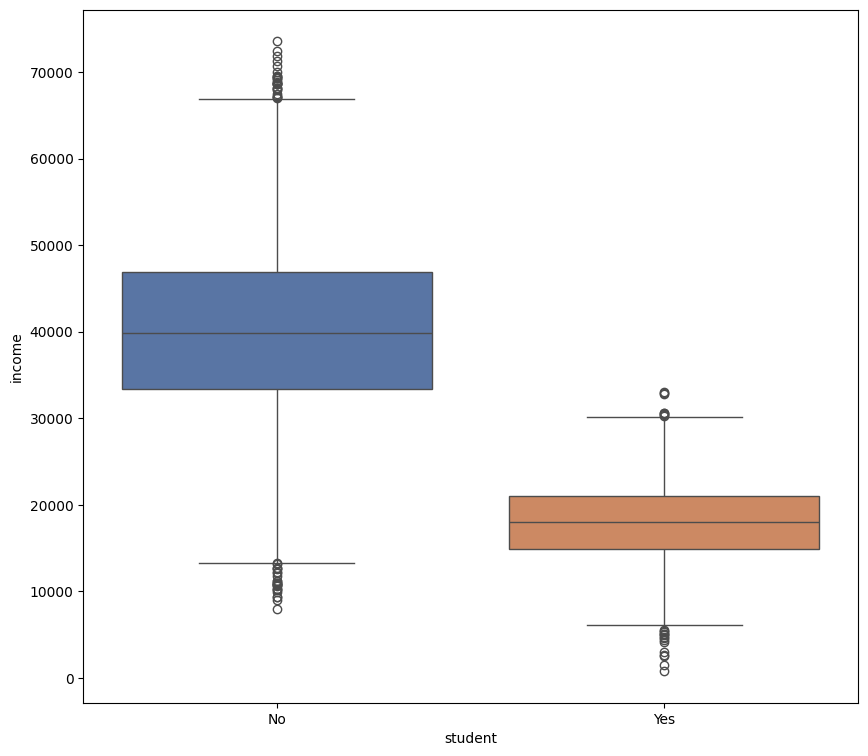

In [16]:
plt.figure(figsize = (10, 9))
sns.boxplot(data = DF,
            x = 'student',
            y = 'income',
            order = ['No', 'Yes'],
            palette = 'deep')
plt.show()

> ## 2) 'income' vs. 'amount'

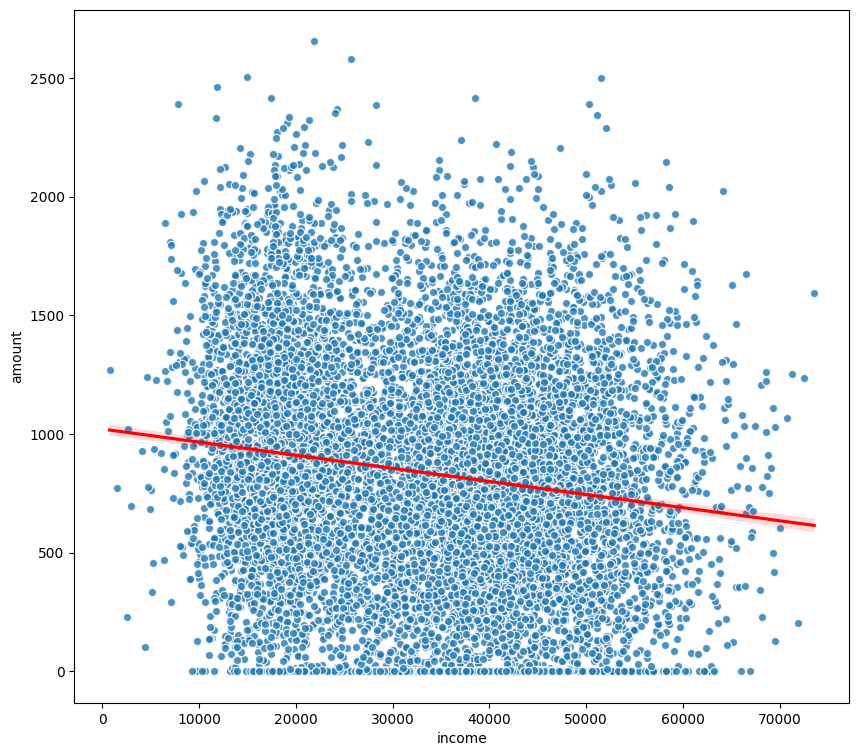

In [17]:
plt.figure(figsize = (10, 9))
sns.regplot(data = DF,
            x = 'income',
            y = 'amount',
            line_kws = {'color':'red'},
            scatter_kws = {'edgecolor' : 'white'})
plt.show()

# II. Data Preprocessing

> ## 1) X, y

In [18]:
X = DF[['amount']]
y = DF['default']

> ## 2) train_test_split( )

* 7: 3

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7000, 1) (7000,)
Test Data :  (3000, 1) (3000,)


# III. Modeling

> ## 1) Model 학습

In [20]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression()

> ## 2) 예측값 생성

In [21]:
y_hat = Model_lr.predict(X_test)

* y_hat

In [22]:
y_hat

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(3000,), dtype=object)

* Probability

In [23]:
import numpy as np
np.set_printoptions(precision = 3, suppress = True)

Model_lr.predict_proba(X_test)

array([[0.991, 0.009],
       [0.996, 0.004],
       [0.987, 0.013],
       ...,
       [0.96 , 0.04 ],
       [1.   , 0.   ],
       [0.991, 0.009]], shape=(3000, 2))

# IV. Model Validation

> ## 1) Confusion Matrix

* 'No'(상환) 기준

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[2888,    8],
       [  72,   32]])

* 'Yes'(연체) 기준

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = ['Yes','No'])

array([[  32,   72],
       [   8, 2888]])

> ## 2) Accuracy, Precision, Recall - 'No(상환)'

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'No'))
print(recall_score(y_test, y_hat, pos_label = 'No'))

0.9733333333333334
0.9756756756756757
0.9972375690607734


> ## 3) Accuracy, Precision, Recall - 'Yes(연체)'

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Yes'))
print(recall_score(y_test, y_hat, pos_label = 'Yes'))

0.9733333333333334
0.8
0.3076923076923077


> ## 4) F1_Score - 'No(상환)'

In [28]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'No')

0.9863387978142076

> ## 5) F1_Score - 'Yes(연체)'

In [29]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'Yes')

0.4444444444444444

> ## 6) Classification Report

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat,
                            target_names = ['No', 'Yes'],
                            digits = 5))

              precision    recall  f1-score   support

          No    0.97568   0.99724   0.98634      2896
         Yes    0.80000   0.30769   0.44444       104

    accuracy                        0.97333      3000
   macro avg    0.88784   0.65246   0.71539      3000
weighted avg    0.96959   0.97333   0.96755      3000



#
#
#
# End Of Document
#
#
#